# **Introduction to Images and Vectorization**

Most of the times, when people think of working with images, **photoshop** is what comes to mind. In this notebook we will learn how to using **Python for image processing** using PIL library.

The **Python Imaging Library** adds image processing capabilities to your Python interpreter.

**In this notebook we will learn to load the images and Vectorization of the images.**

## **What's Covered?**
1. Digital Image Representation 
    - Image Types
    - Color Image Modes
    - Image Formats
2. Loading Images with Matplotlib
3. Loading Images with PIL
4. Images as Arrays
    - Creating a PIL Image
    - Get Pixel Value
    - Set Pixel Value
    - Converting PIL Image to Numpy Array
5. Segregating Channels from a Color Image
6. Convert Image Modes
7. Vectorization - Flatten Multichannel Image
    - Step 1 - Read the Image using PIL
    - Step 2 - Covert PIL image object to numpy array
    - Step 3 - Flattening the numpy array

## **Digital Image Representation**
An image is represented as a matrix of Pixel values. Each pixel can have different values depending on the image type.

**Pixel:** In digital imaging, a pixel (abbreviated px), or picture element is the smallest addressable element in an image, or the smallest addressable element in a dot matrix display device. In most digital display devices, pixels are the smallest element that can be manipulated through software.

**RGB (Red, Green, and Blue):** In digital imaging RGB are the primary color of light. The RGB color model is an additive color model where colors are created by combining these three primary colors in various intensities. Each color in the RGB model is represented by a combination of three values, one for each primary color, typically ranging from 0 to 255. In the RGB model, each pixel in an image is represented by three values corresponding to the intensity of red, green, and blue light


### **a. Image Types**
1. **Binary Image (AKA 1bit Gray Scale):** Consists of pixels with values 0 (for black) and 1 (for white). Useful for black and white document scanning.
2. **Grayscale Image:** Represented as a 2D array where each value corresponds to the intensity (0-255 for 8-bit image), ranging from black to white.
3. **Color Image:** It is represented as a 3D array. Include multiple channels (typically RGB). Each channel represent a different color component. Each channel is a grayscale representing the intensity level of that color. There are several popular **Image Modes** for color images in digital imaging.

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
    <style>
        .image-row {
            display: flex;
            justify-content: center;
            gap: 10px; /* Space between images */
            margin: 20px 0; /* Space above and below the image row */
        }
        .image-row img {
            max-width: 100%; /* Make images responsive */
            height: auto; /* Maintain aspect ratio */
        }
    </style>
</head>
<body>
    
<div class="image-row">
        <img src="images/image_types/1bit_grayscale_image.png" alt="1-bit Gray Scale Image">
        <img src="images/image_types/8bit_grayscale_image.png" alt="8-bit Gray Scale Image">
        <img src="images/image_types/8bit_rgb_image.jpg" alt="8-bit RGB Scale Image">
</div>

</body>
</html>


### **b. Color Image Modes**
An image mode determines the number of colors that can be displayed in an image and can also affect the file size of the image.
Image modes represent the color space or the number of channels in an image. The most common image modes include:
1. **RGB (Red, Green, Blue):** The most common and general purpose color mode for digital images. Each pixel is composed of three color channels: Red, Green, and Blue.
2. **RGBA (Red, Green, Blue, Alpha):** Similar to RGB but includes an additional channel (alpha) for representing transparency. Used for Web Graphics to create images with transparent backgrounds.
3. **CMYK (Cyan, Magenta, Yellow, Key/Black):** Used in color printing. It represents colors using four channels: Cyan (sai-an), Magenta, Yellow, and Black.
4. **Indexed (AKA Palette) Color:** Uses a color palette to represent the image. Each pixel's color is an index into the palette.
5. **HSV (Hue, Saturation, Value):** HSV is often used in computer vision and image processing tasks because it separates color information from brightness, making certain operations more intuitive.

### **c. Image Formats**
Image formats refer to the ways in which digital images are encoded and stored. Each format has its own specifications for representing color information, transperancy, compression, and other features. Common image formats include:
1. **JPEG (Joint Photographic Experts Group):** Well-suited for photographs and images with complex color gradients. It uses lossy compression. Reduces file size significantly at the cost of some image quality. 
2. **PNG (Portable Network Graphics):** Suitable for images with transparency and sharp edges, such as logos and icons. It uses lossless compression.
3. **GIF (Graphics Interchange Format):** Often used for simple graphics, animations, and images with a limited color palette. It uses lossless compression and supports animation.
4. **TIFF (Tagged Image File Format):** A flexible format suitable for high-quality images and professional printing. It supports lossless compression and can store multiple images in a single file.
5. **BMP (Bitmap by Microsoft):** A basic, uncompressed format used for simple graphics. It stores color information pixel by pixel.
6. **RAW:** A format used to store minimally processed data from the image sensor of a digital camera. It retains more information but results in larger file sizes.
7. **WebP (by Google):** It provides both lossy and lossless compression. It aims for smaller file sizes while maintaining image quality.
8. **HEIC:** Suitable for mobile photography (like iphone).

In [1]:
import numpy as np
import pandas as pd

## **Loading Images with Matplotlib**

<class 'numpy.ndarray'> (148, 150, 3)


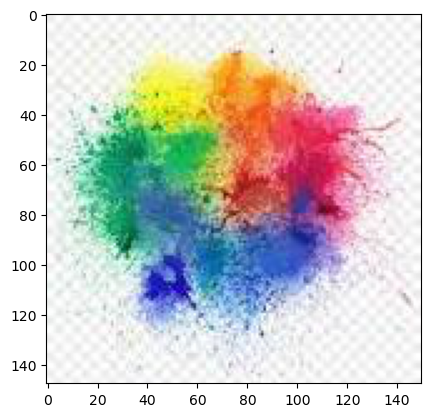

In [2]:
from matplotlib import image
import matplotlib.pyplot as plt

img = image.imread(r'C:\Users\pc\Downloads\')

print(type(img), img.shape)

plt.imshow(img)

## **Loading Images with PIL**

<class 'PIL.JpegImagePlugin.JpegImageFile'> (640, 452)


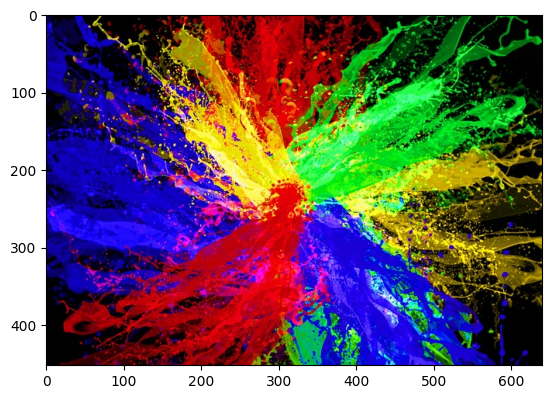

In [3]:
from PIL import Image

img = Image.open('images/original_imgs/test_image.jpg')

print(type(img), img.size)

plt.imshow(img)

In [4]:
# img.show() # Opens in new window
# display(img)

In [5]:
# Properties of PIL Image Object

print("Image File Name:", img.filename)

print("Shape/Size of Image:", img.size) # (Width, Height in pixels)

print("Image Mode:", img.mode)

print("Image Format:", img.format)

Image File Name: images/original_imgs/test_image.jpg
Shape/Size of Image: (640, 452)
Image Mode: RGB
Image Format: JPEG


## **Images as Arrays**

What is an image? So far, PIL has handled loading images and displaying them. However, if we're going to use images as data, we need to understand what that data looks like.  
Most image formats have three color "channels": Red, Green, and Blue (some images also have a fourth channel called "alpha" that controls transparency). For each pixel in an image, there is a value for every channel.

The way this is represented as data is as a three-dimensional matrix. The width of the matrix is the width of the image, the height of the matrix is the height of the image, and the depth of the matrix is the number of channels. So, as we saw, the height and width of our image are both 100 pixels. This means that the underlying data is a matrix with the dimensions `100x100x3`.


### **a. Creating a PIL Image**

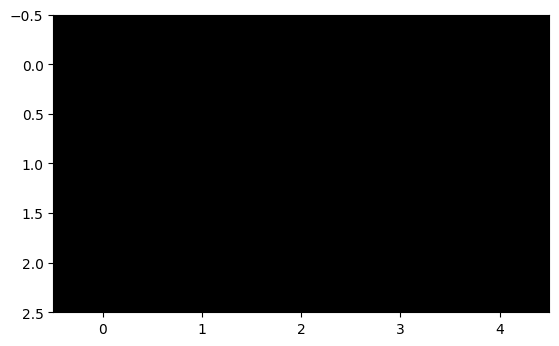

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.new(mode="RGB", size=(5, 3), color=(0, 0, 0))

plt.imshow(img)

### **b. Get Pixel Value**

In [7]:
# (x, y) position
xy = (2, 1)

# Get pixel value
pixel_value = img.getpixel(xy)
print(pixel_value)

(0, 0, 0)


### **c. Set Pixel Value**

(255, 255, 255)


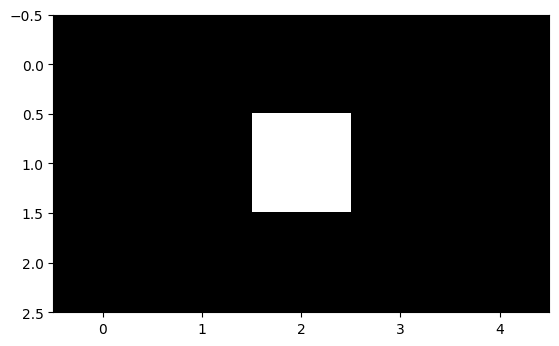

In [8]:
# (x, y) position
xy = (2, 1)

# Pixel value
value = (255, 255, 255)

# Set pixel value
img.putpixel(xy, value)

# Get pixel value
pixel_value = img.getpixel(xy)
print(pixel_value)

plt.imshow(img)

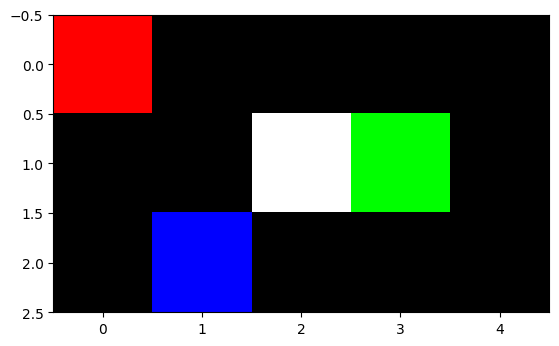

In [9]:
# (x, y) position
xy_1 = (0, 0)
xy_2 = (3, 1)
xy_3 = (1, 2)

# Pixel value
value_1 = (255, 0, 0)
value_2 = (0, 255, 0)
value_3 = (0, 0, 255)

# Set pixel value
img.putpixel(xy_1, value_1)
img.putpixel(xy_2, value_2)
img.putpixel(xy_3, value_3)

plt.imshow(img)

### **d. Converting PIL Image to Numpy Array**

In [10]:
# Turn our image object into a NumPy array
img_arr = np.array(img)

print(img_arr)

[[[255   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]
  [  0 255   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


```python
# This is equivalent to the following representation
array = np.array([  
    [[  255,   0,   0], [  0,   0,   0], [  0,   0,   0], [  0,   0,   0], [  0,   0,   0]],  
    [[  0,   0,   0], [  0,   0,   0], [255, 255, 255], [  0,   255,   0], [  0,   0,   0]],  
    [[  0,   0,   0], [  0,   0,   255], [  0,   0,   0], [  0,   0,   0], [  0,   0,   0]]  
])
```

### **e. Saving an Image**

In [11]:
img.save('images/transformed/black_with_rgb_dot.jpg')

## **Segregating Channels from a Color Image**

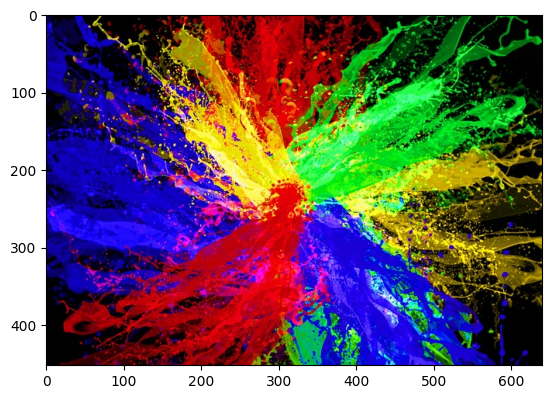

In [12]:
img = Image.open('images/original_imgs/test_image.jpg')

plt.imshow(img)

In [13]:
# Turn our image object into a NumPy array
img_arr = np.array(img)

print("PIL Image:")
print("Type:", type(img))
print("Shape/Size:", img.size)
print()
print("After converting PIL image to Numpy Array:")
print("Type:", type(img_arr))
print("Shape/Size:", img_arr.shape)

PIL Image:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Shape/Size: (640, 452)

After converting PIL image to Numpy Array:
Type: <class 'numpy.ndarray'>
Shape/Size: (452, 640, 3)


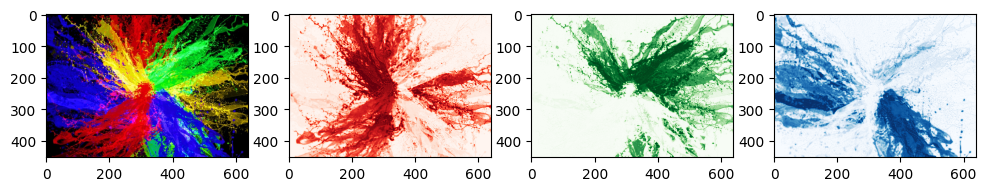

In [14]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 4, 1)
plt.imshow(img_arr)

plt.subplot(1, 4, 2)
plt.imshow(img_arr[:,:,0], cmap='Reds')

plt.subplot(1, 4, 3)
plt.imshow(img_arr[:,:,1], cmap='Greens')

plt.subplot(1, 4, 4)
plt.imshow(img_arr[:,:,2], cmap='Blues')

In [15]:
# Another way to segregate the channels
img.split()

(<PIL.Image.Image image mode=L size=640x452>,
 <PIL.Image.Image image mode=L size=640x452>,
 <PIL.Image.Image image mode=L size=640x452>)

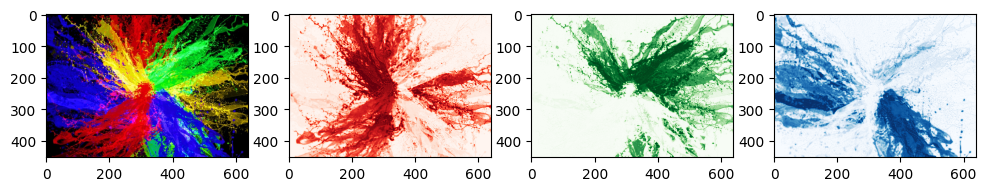

In [16]:
red, green, blue = img.split()

plt.figure(figsize=(12, 12))

plt.subplot(1, 4, 1)
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.imshow(red, cmap='Reds')

plt.subplot(1, 4, 3)
plt.imshow(green, cmap='Greens')

plt.subplot(1, 4, 4)
plt.imshow(blue, cmap='Blues')

## **Convert Image Modes**

It is used to change the mode of an image. The mode of an image defines the type and depth of a pixel in the image. Different modes support different types of images, and converting between them can be useful for various image processing tasks.

### **Common Image Modes in Pillow**

1. **"1" (1-bit pixels, black and white, stored with one pixel per byte)**
> - **Purpose:** For creating binary images.
> - **Application:** Document scanning, simple graphics.

2. **"L" (8-bit pixels, grayscale)**
> - **Purpose:** For grayscale images where each pixel is represented by a single byte.
> - **Application:** Image processing tasks where color is not important, reducing image size.

3. **"P" (8-bit pixels, mapped to any other mode using a color palette)**
> - **Purpose:** For images with a limited number of colors (up to 256).
> - **Application:** Saving storage space in image files, GIF images.

4. **"RGB" (3x8-bit pixels, true color)**
> - **Purpose:** For standard true-color images with red, green, and blue channels.
> - **Application:** Most common for displaying images in full color.

5. **"RGBA" (4x8-bit pixels, true color with transparency mask)**
> - **Purpose:** For true-color images with an alpha channel for transparency.
> - **Application:** Web graphics, icons, images with varying transparency.

6. **"CMYK" (4x8-bit pixels, color separation)**
> **Purpose:** For color printing.
> **Application:** Preparing images for printing processes.

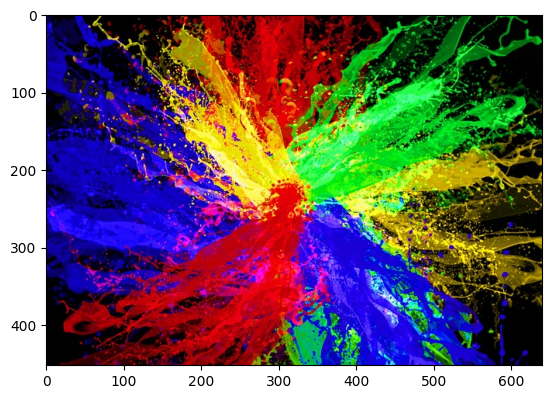

In [17]:
from PIL import Image

# Open an image file
image = Image.open('images/original_imgs/test_image.jpg')

plt.imshow(image)

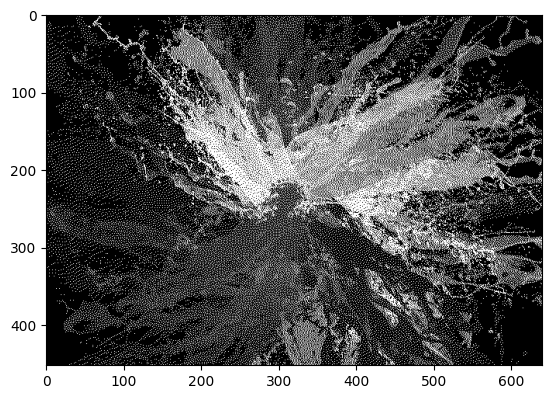

In [18]:
# Convert to binary_scale
binary_image = image.convert('1')

plt.imshow(binary_image)

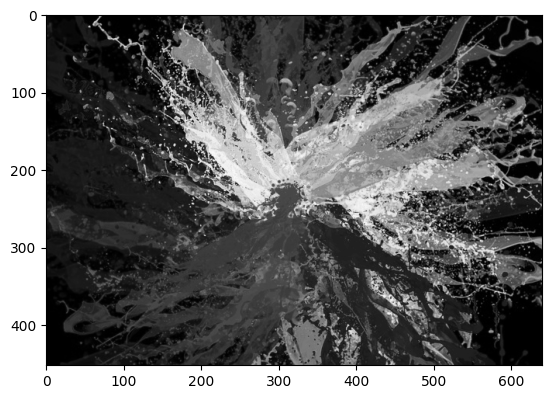

In [19]:
# Convert to grayscale
gray_image = image.convert('L')

plt.imshow(gray_image, cmap="gray")

In [20]:
print(np.array(binary_image))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [21]:
print(np.array(gray_image))

[[11 10 10 ...  0  0  0]
 [11 11 11 ...  0  0  0]
 [11 11 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


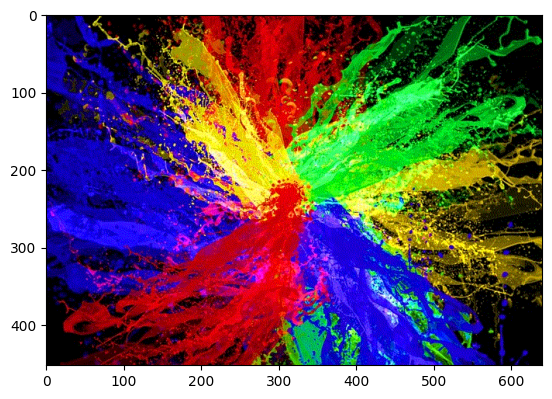

In [22]:
# Convert to palette image
palette_image = image.convert('P')

plt.imshow(palette_image)

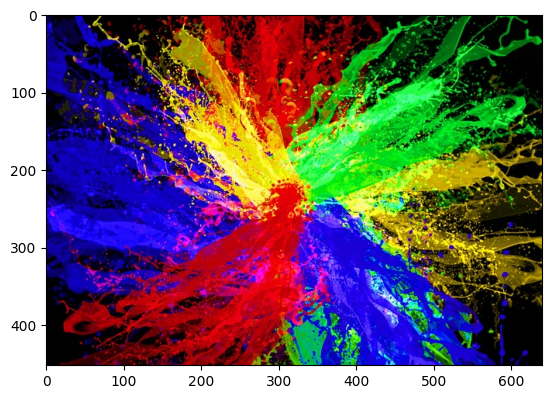

In [23]:
# Convert to RGBA
rgba_image = image.convert('RGBA')

plt.imshow(rgba_image)

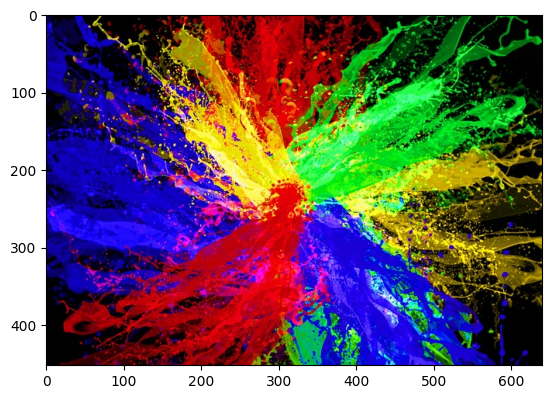

In [24]:
# Convert to CMYK
cmyk_image = image.convert('CMYK')

plt.imshow(cmyk_image)

## **Vectorization: Flatten Multichannel Image**

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

### **Step-1: Read the Image using PIL**

Image Resolution: (7680, 4320)


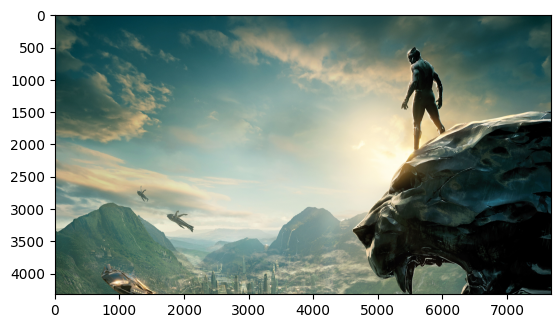

In [26]:
img = Image.open('images/original_imgs/bp.jpg')

print("Image Resolution:", img.size)

plt.imshow(img)

In [27]:
print(f"Mode: {img.mode}")
print(f"Format: {img.format}")

Mode: RGB
Format: JPEG


### **Step-2: Covert PIL image object to numpy array**

In [28]:
# Converting to numpy array
img_arr = np.array(img)

print("Numpy Array Shape:", img_arr.shape)

Numpy Array Shape: (4320, 7680, 3)


In [29]:
print(img_arr)

[[[31 66 62]
  [32 67 63]
  [33 68 64]
  ...
  [ 5 47 46]
  [ 3 45 44]
  [ 1 43 42]]

 [[35 70 66]
  [35 70 66]
  [36 71 67]
  ...
  [ 5 47 46]
  [ 4 46 45]
  [ 3 45 44]]

 [[38 73 69]
  [38 73 69]
  [38 73 69]
  ...
  [ 4 46 45]
  [ 4 46 45]
  [ 3 45 44]]

 ...

 [[54 77 61]
  [53 76 60]
  [54 77 61]
  ...
  [52 72 73]
  [53 73 74]
  [51 71 72]]

 [[54 77 61]
  [53 76 60]
  [54 77 61]
  ...
  [51 71 72]
  [53 73 74]
  [52 72 73]]

 [[54 77 61]
  [53 76 60]
  [54 77 61]
  ...
  [51 71 72]
  [53 73 74]
  [52 72 73]]]


### **Step 3 - Flattening the numpy array**

In [30]:
# Flattening the image

img_arr.ravel()

array([31, 66, 62, ..., 52, 72, 73], dtype=uint8)

In [31]:
# Check the shape of Flattened Image
flat_img_arr = img_arr.ravel()

print(flat_img_arr.shape)

(99532800,)
